# EDA for Ames Housing Data

## Setup/Read Data

In [ ]:
%load_ext autoreload
%autoreload 2

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_dict
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [243]:
df = pd.read_csv("../data/Ames_Housing_Price_Data.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [244]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [245]:
# see counts to quickly find missing values. count should be 2590
df.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


## Missing Values / NaNs
We see that we have a lot of NaNs in our data. However, this is not necessarily missing data! E.g., a NaN in column `Alley` means there is No Alley
See: data dictionary for details

In [246]:
missingCols = df.isnull().any()
print(f'The columns with missing values are %s {df.columns[missingCols]}')
# ncbirths = ncbirths.drop(missingRows.ID)

The columns with missing values are %s Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [247]:
missingRows = df[df.isnull().any(axis=1)]

In [249]:
# all rows have some missing values
# NOTE: but these missing values might have meanings as with `Alley`
missingRows

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


## Duplicate(s)

In [250]:
# We see that there are duplicate PIDs
df.PID.is_unique
# or do
# df.PID.duplicated().any()

False

In [251]:
# We have one duplicated row
df[df.PID.duplicated()] # PID 909276070 is a dupe!

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [252]:
# We manually verify that the rows are identical
df[df['PID'] == 909276070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1816,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [254]:
# Drop the dupe and we have 2579 rows now TODO check with team
df.drop_duplicates(inplace=True)

## SalePrice
* distribution
* outliers

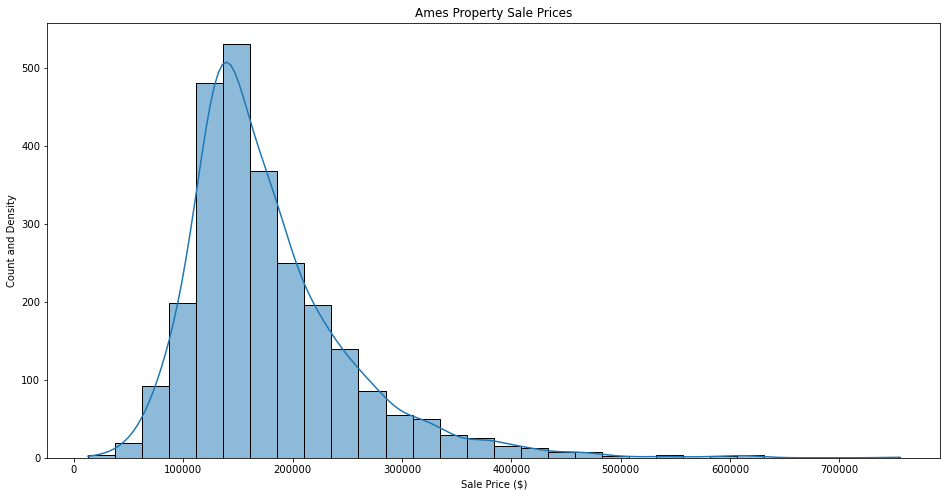

In [255]:
# We see from the histogram that the SalePrice is skewed and there are outliers

# df.SalePrice.hist(bins=30)
# df.SalePrice.plot.kde()
plt.figure(figsize=(16,8))
sns.histplot(df.SalePrice, bins=30, kde=True)
plt.title("Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.show()

In [256]:
# SalePrice mean, median show the above skewness
print(f'Mean: {round(df.SalePrice.mean())}')

Mean: 178053


In [257]:
print(f'Median: {round(df.SalePrice.median())}')


Median: 159900


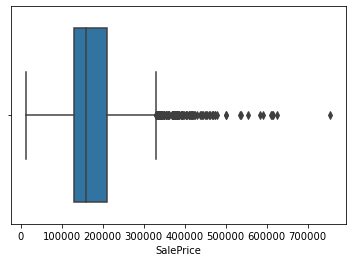

In [267]:
# See outliers
sns.boxplot(x = df.SalePrice, )
plt.show()

In [268]:
# Outliers (4 std dev)

# 13 properties outside 3 std dev from mean
# See: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
salePriceOutliers = df[np.abs(stats.zscore(df.SalePrice)) > 4]
salePriceOutliers.sort_values('SalePrice')

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
290,528110040,2552,479069,20,RL,107.0,13891,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
214,528176010,2696,500000,20,RL,110.0,14300,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
108,528118050,2290,500067,20,RL,59.0,17169,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
407,527214060,2698,535000,60,RL,82.0,16052,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
802,527216070,3279,538000,60,RL,47.0,53504,Pave,NaN,IR2,...,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1112,528106020,2402,555000,20,RL,105.0,15431,Pave,NaN,Reg,...,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal
2088,528360050,3500,584500,60,RL,114.0,17242,Pave,NaN,IR1,...,210,0,NaN,NaN,NaN,0,5,2006,WD,Normal
615,527216080,2338,591587,20,RL,52.0,51974,Pave,NaN,IR1,...,322,0,NaN,NaN,NaN,0,6,2007,New,Partial
1639,528110020,2674,610000,20,RL,105.0,13693,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
584,528150070,2364,611657,20,RL,100.0,12919,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,New,Partial


Outliers: We see that there are no cheap property outliers. Only expensive outliers. Lowest outlier is $\$404K and highest is $\$755K. Oh, to be back in the 2000s in Iowa...

In [269]:
# Remove the outliers TODO check with team
df.drop(salePriceOutliers.PID.index, inplace=True)

In [272]:
# Check: removed 13 outliers and 1 duplicate so far for 2566 remaining properties
df.shape

(2566, 81)

## Sale Details
Let's look at SalePrice by
* SaleType
* SaleCondition
* MSSubClass (type of dwelling)

Check most common types for each:

### SaleType

In [239]:
# We see that most SaleTypes are `WD` (Warranty Deed - Conventional)
pd.concat([data_dict.SaleType,
           df.SaleType.value_counts().rename("Count"),
           (df.SaleType.value_counts()/len(df)).rename("Percent")], axis=1)\
    .sort_values("Count", ascending=False)

,SaleType,Count,Percent
WD,Warranty Deed - Conventional,2360,0.930233
New,Home just constructed and sold,69,0.027197
COD,Court Officer Deed/Estate,50,0.019708
ConLD,Contract Low Down,23,0.009066
CWD,Warranty Deed - Cash,11,0.004336
ConLw,Contract Low Down payment and low interest,8,0.003153
ConLI,Contract Low Interest,6,0.002365
Con,Contract 15% Down payment regular terms,5,0.001971
Oth,Other,4,0.001577
VWD,Warranty Deed - VA Loan,1,0.000394


### SaleCond

In [240]:
# We see that most SaleCondition are `Normal`
pd.concat([df.SaleCondition.value_counts(),
           (df.SaleCondition.value_counts()/len(df)).rename("Percent")], axis=1)

,SaleCondition,Percent
Normal,2382,0.938904
Partial,72,0.028380
Abnorml,60,0.023650
Family,17,0.006701
Alloca,4,0.001577
AdjLand,2,0.000788


In [371]:
# Normal properties go for $170K
# Partial go for more (these are new homes, so makes sense)
# Abnormal go for less (these are foreclosures, etc, so makes sense)
# Family go for less (family discount, so makes sense)
df.groupby('SaleCondition')[['SalePrice']].agg(['mean', 'median'])

SalePrice          
                        mean    median
SaleCondition                         
Abnorml        143739.754098  132000.0
AdjLand        138750.000000  138750.0
Alloca         156766.500000  152556.5
Family         146958.823529  149000.0
Normal         174163.086486  158000.0
Partial        268399.142857  246578.0

### MSSubClass (Dwelling Type)

In [241]:
# We see that most Dwelling Types (MSSubClass) are `20` or `60`. Not sure if this tells us much...
pd.concat([data_dict.MSSubClass,
           df.MSSubClass.value_counts().rename("Count"),
           (df.MSSubClass.value_counts()/len(df)).rename("Percent")], axis=1)\
    .sort_values('Count', ascending=False)

,MSSubClass,Count,Percent
20,1-STORY 1946 & NEWER ALL STYLES,914,0.360268
60,2-STORY 1946 & NEWER,488,0.192353
50,1-1/2 STORY FINISHED ALL AGES,257,0.101301
120,1-STORY PUD (Planned Unit Development) - 1946 ...,169,0.066614
30,1-STORY 1945 & OLDER,123,0.048482
160,2-STORY PUD - 1946 & NEWER,120,0.047300
70,2-STORY 1945 & OLDER,116,0.045723
80,SPLIT OR MULTI-LEVEL,109,0.042964
90,DUPLEX - ALL STYLES AND AGES,87,0.034292
190,2 FAMILY CONVERSION - ALL STYLES AND AGES,53,0.020891


## General House Details and Exterior
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* MasVnrArea: Masonry veneer area in square feet
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* ExterQual: Evaluates the quality of the material on the exterior
* ExterCond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fence: Fence quality
* Functional: Home functionality (Assume typical unless deductions are warranted)
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature

### Area
Here, we consider the size of the house and its effect on price and interactions with other features

In [301]:
# GrLivArea is _usually_ the sum of first and second floor SFs
ExtraLivArea = df.GrLivArea - df['1stFlrSF'] - df['2ndFlrSF']
df[ExtraLivArea > 0]  # 33 properties with bonus living area not included in 1st and 2nd floors

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
170,535381040,2377,142900,50,RL,60.0,10410,Pave,Grvl,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
181,903204095,935,79500,40,RM,50.0,9100,Pave,NaN,Reg,...,0,0,NaN,NaN,Shed,600,8,2008,WD,Normal
205,903484080,1484,50000,50,RM,60.0,10320,Pave,Grvl,Reg,...,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml
211,533212100,1200,151000,160,FV,30.0,3180,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
219,909250210,1522,102000,50,RL,60.0,6000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
339,903475040,1382,128500,50,RM,NaN,12358,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
469,902330010,2358,122000,70,RM,50.0,5250,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
474,535375050,1656,135000,50,RL,60.0,10410,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal
675,905452110,1531,127000,50,RL,50.0,9350,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
766,902405120,1480,119000,50,RM,60.0,5400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,9,2009,ConLI,Family


In [303]:
# Upon inspection of above, we see that the extra space is coming from LowQualFinSF,
# so GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF
# so we can ignore those columns unless we wish to do some particular analysis...
sum(df.GrLivArea - df['1stFlrSF'] - df['2ndFlrSF'] - df.LowQualFinSF)

0

In [304]:
# drop redundant Area features
df.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], inplace=True, axis=1)

In [316]:
# Does area (size of a house) have an effect on price? Check via linear regression
area_lm = LinearRegression()
area_lm.fit(df[['GrLivArea']], df.SalePrice)
print(f'R^2 of GrLivArea vs SalePrice: {round(area_lm.score(df[["GrLivArea"]], df.SalePrice), 4)}')
print(f'Coefficients: {area_lm.coef_}')

R^2 of GrLivArea vs SalePrice: 0.5054
Coefficients: [103.28836427]


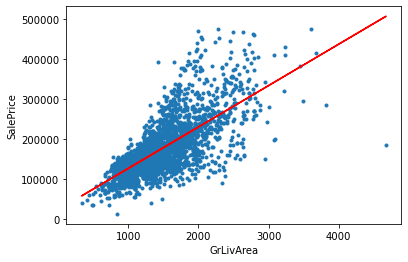

In [355]:
# Plot area vs saleprice regression
# See: https://www.statology.org/scatterplot-with-regression-line-python/
plt.plot(df.GrLivArea, df.SalePrice, '.')
m, b = np.polyfit(df.GrLivArea, df.SalePrice, 1)
plt.plot(df.GrLivArea, m*df.GrLivArea+b, color='red')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

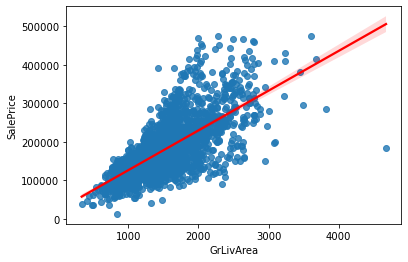

In [356]:
# Above, but using sns.regplot instead. (It's a bit easier to use than above)
sns.regplot(data = df, x = df.GrLivArea, y = df.SalePrice,
            line_kws = {"color": 'red'})
plt.show()

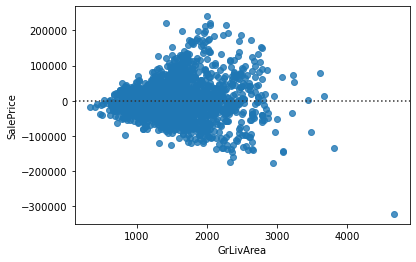

In [357]:
# TODO insight ask team if this is okay. Variance increases as size of property increases
sns.residplot(data = df, x = df.GrLivArea, y = df.SalePrice)
plt.show()

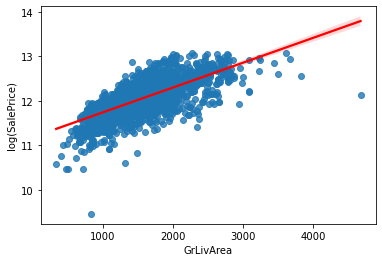

In [358]:
# Try log(SalePrice), I guess?
sns.regplot(data = df, x = df.GrLivArea, y = np.log(df.SalePrice),
            line_kws = {"color": 'red'})
plt.ylabel("log(SalePrice)")
plt.show()

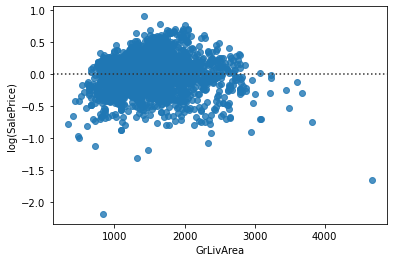

In [359]:
# these residuals look better!
sns.residplot(data = df, x = df.GrLivArea, y = np.log(df.SalePrice))
plt.ylabel("log(SalePrice)")
plt.show()